# Classification on 

In this first step, we import all the libraries we’ll need throughout the project. We use NumPy for numerical operations, Matplotlib for plotting, and Keras (from TensorFlow) to build and train our neural network.


In [1]:

#Importing needed libraries

import numpy as np
import matplotlib.pyplot as plt
import setuptools.dist
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers, models
from tensorflow.keras.utils import plot_model
from keras.models import load_model


2025-05-02 10:12:44.036164: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-02 10:12:46.779975: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-02 10:12:48.315384: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746173569.785404    5489 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746173570.251273    5489 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-02 10:12:54.133972: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

# Prepping Data

Here, we load the MNIST dataset and preprocess it. We normalize the image pixel values to be between 0 and 1, flatten the 28x28 images into 784-dimensional vectors, and split off 10,000 examples from the training set to use later for calibration.


In [2]:

#Loading
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


#normalizing mnist data
train_images = train_images.reshape((60000, 28*28)) / 255
test_images = test_images.reshape((10000, 28*28)) / 255

# Splitting off calibration data from training data
calibration_size = 10000  # Number of samples for calibration
calibration_images = train_images[:calibration_size]
calibration_labels = train_labels[:calibration_size]

# Updating training data to exclude calibration samples
train_images = train_images[calibration_size:]
train_labels = train_labels[calibration_size:]

#print(len(train_images))
#print(len(test_images))



11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


# Neural network intialization

In this part, we define our neural network architecture using Keras' Sequential API. The model has two hidden layers with ReLU activations and an output layer with 10 neurons using softmax for multi-class classification. We also print the model summary to check its structure.


In [3]:

model = models.Sequential()

# Input layer
model.add(layers.Input(shape=(784,)))

# first hidden layer of 128 neurons (one for each class) with activation function softmax
model.add(layers.Dense(128, activation='relu'))

# second hidden layer of 64 neurons (one for each class) with activation function softmax
model.add(layers.Dense(64, activation='relu'))

# output layer of 10 neurons (one for each class) with activation function softmax
model.add(layers.Dense(10, activation='softmax'))


#model description
model.summary()

2025-05-02 10:13:26.439680: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

# Model training

We compile the model using the Adam optimizer and sparse categorical crossentropy as the loss function. Then, we train it on the processed training data for 10 epochs with a batch size of 64. After training, we save the model for future use.

In [4]:
#compiling model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#training model
batch_size=64
model.fit(train_images, train_labels,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=1,
                    validation_data=(test_images, test_labels))


#saving the model
model.save('mnist_classification_model.h5')
#loading the model for later use
model=load_model('mnist_classification_model.h5')


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8424 - loss: 0.5452 - val_accuracy: 0.9577 - val_loss: 0.1440
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9623 - loss: 0.1295 - val_accuracy: 0.9667 - val_loss: 0.1090
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9742 - loss: 0.0872 - val_accuracy: 0.9697 - val_loss: 0.0951
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9802 - loss: 0.0626 - val_accuracy: 0.9677 - val_loss: 0.0952
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9855 - loss: 0.0484 - val_accuracy: 0.9743 - val_loss: 0.0837
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9887 - loss: 0.0369 - val_accuracy: 0.9750 - val_loss: 0.0842
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9910 - loss: 0.0295 - val_accuracy: 0.9704 - val_loss: 0.0982
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9931 - loss: 0.0236 - val_accuracy: 0.

# Visualizing images

We define a small utility function to display a test image by its index. This helps us verify what the model is predicting by looking at the actual handwritten digit image.


In [5]:
#show image function
def show_image(test_image_index):
    corr_image = test_images[test_image_index].reshape(28,28) 
    plt.imshow(corr_image, cmap='gray')
    plt.axis('off')
    plt.show()



In this final step, we define a function that loads the trained model and uses it to make a prediction on a specific test image. We compare the model’s prediction to the true label, and then display the corresponding handwritten digit to visually verify the result.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Model prediction: 0
Ground truth:0
Real Image:


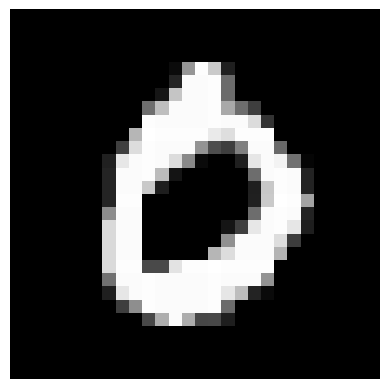

In [6]:
#model prediction on specific test image
from keras.models import load_model
def f_hat(test_image_index):
    model= load_model('mnist_classification_model.h5')
    model.compile(loss='sparse_categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
    f = model.predict(np.expand_dims(test_images[test_image_index],axis=0))
    print("Model prediction: "+str(np.argmax(f[0])))
    print("Ground truth:" + str(test_labels[test_image_index]))
    print("Real Image:")
    show_image(test_image_index)

f_hat(3)

In [21]:
# Prédictions sur calibration et test
model = load_model('mnist_classification_model.h5')
cal_probs = model.predict(calibration_images)
test_probs = model.predict(test_images)

# Scores de non-conformité : 1 - proba de la bonne classe
cal_scores = 1 - np.array([cal_probs[i, calibration_labels[i]] for i in range(len(calibration_labels))])

# Seuil conforme (quantile conservateur)
alpha = 0.001
n = len(cal_scores)
k = int(np.ceil((n + 1) * (1 - alpha)))
q_hat = np.sort(cal_scores)[k - 1] if k <= n else np.max(cal_scores)


# Créer les ensembles de prédiction
prediction_sets = [np.where(probs >= 1 - q_hat)[0] for probs in test_probs]

# Évaluer la couverture
coverage = np.mean([test_labels[i] in prediction_sets[i] for i in range(len(test_labels))])
avg_size = np.mean([len(s) for s in prediction_sets])

print(f"Empirical coverage : {coverage:.3f}")
print(f"Average cardinality of predicted sets : {avg_size:.2f}")



313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 612us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 473us/step
Empirical coverage : 1.000
Average cardinality of predicted sets : 2.18


<Figure size 640x480 with 0 Axes>

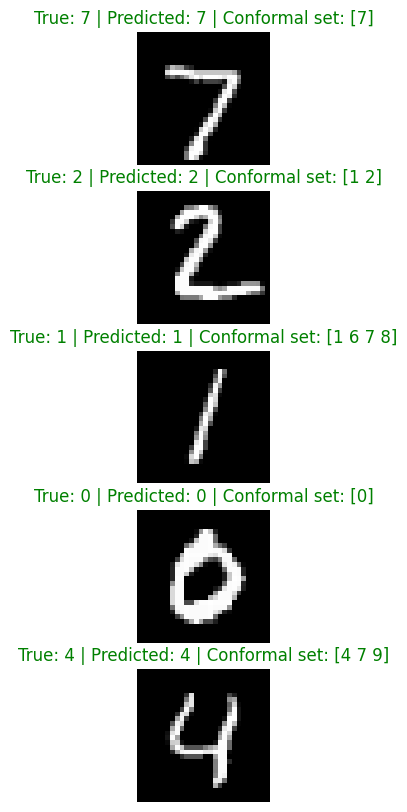

In [23]:
def show_conformal_predictions(images, y_true, y_pred, pred_sets, n=10):
    plt.figure(figsize=(12, 2 * n))
    for i in range(n):
        plt.subplot(n, 1, i + 1)
        plt.imshow(images[i].reshape(28,28), cmap="gray")
        plt.axis("off")
        true = y_true[i]
        pred = y_pred[i]
        pred_set = pred_sets[i]
        color = "green" if true in pred_set else "red"
        plt.title(f"True: {true} | Predicted: {pred} | Conformal set: {pred_set}", color=color)

plt.tight_layout()
plt.show()

# 7. Show predictions for the first 5 test examples

predicted_labels=np.argmax(test_probs,axis=1)

show_conformal_predictions(test_images, test_labels, predicted_labels, prediction_sets, n=5)
